# HOTELS - Analyse des sentiments - Illustration sur Davys' Crockett

**(1) Préparation du répertoire et des principaux packages**

In [1]:
import os
os.chdir("C:/projet")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

**(2) Analyse rapide du fichier**

**7645 avis** entre septembre 2016 et décembre 2022. dans les 300 avis pour 2022.

In [3]:
import pandas as pd
reviews=pd.read_csv("hotel_davy_crockett_clean.csv", sep=",")
reviews.info( ) #7645 avis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   titre_commentaire  7645 non-null   object 
 1   commentaire        7645 non-null   object 
 2   Mois_Avis          7645 non-null   object 
 3   Annee_Avis         7645 non-null   int64  
 4   Ville              7645 non-null   object 
 5   Pays               7644 non-null   object 
 6   Mois_Sejour        7645 non-null   object 
 7   Annee_Sejour       7569 non-null   float64
 8   Note               7645 non-null   int64  
 9   Photo              7645 non-null   object 
 10  langue             7645 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 657.1+ KB


In [4]:
#Le fichier comprend des avis datés entre septembre 2004 et décembre 2022
reviews['Annee_Avis'].tail(1)

7644    2004
Name: Annee_Avis, dtype: int64

**(3) Profils-clients**

(1). Langue du commentaire : plus de la moitié de francophones, suivis assez loin par les anglophones.

<AxesSubplot:xlabel="Langue de l'avis", ylabel='Nombre de répondants'>

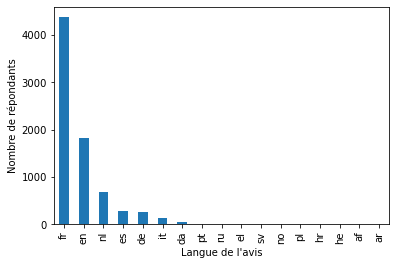

In [8]:
comptage=reviews['langue'].value_counts()
comptage.plot(kind='bar',stacked=True,ylabel="Nombre de répondants",xlabel="Langue de l'avis")

<AxesSubplot:ylabel='langue'>

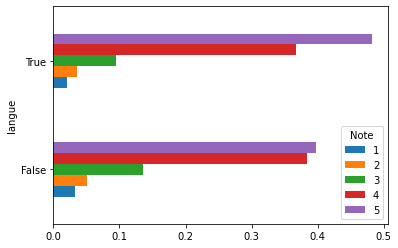

In [9]:
#Ventilation des Avis selon qu'ils sont francophones ou non
T=pd.crosstab(reviews['langue']=='fr',reviews['Note'], normalize='index')
T.plot.barh()

Note    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

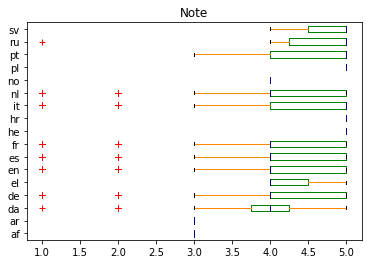

In [10]:
#Boîte de Turkey
color=dict(boxes='green',whiskers='DarkOrange',medians='DarkBlue',caps='Black')
reviews.plot.box(column='Note',by='langue',color=color,sym='r+',vert=False)

**(3). Ventilation des notes.**

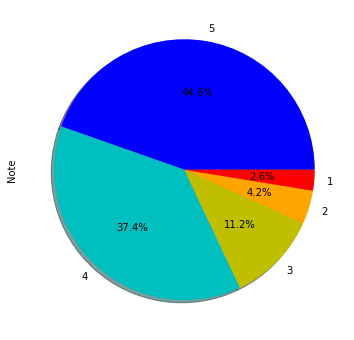

In [11]:
plt.figure(figsize=(6, 6))
cols = ['b','c','y','orange','r']
reviews['Note'].value_counts().plot.pie(autopct='%1.1f%%', shadow= True,colors=cols)
plt.show()

**(4). Analyse de la présence ou non d'une photo**

Les clients ayant donné une note de 5 tendent significativement plus à mettre une photo.

In [12]:
p=pd.crosstab(reviews['Photo'],reviews['Note'],normalize=True)
print(p)

Note          1         2         3         4         5
Photo                                                  
no     0.022891  0.038718  0.106998  0.353957  0.415043
yes    0.002878  0.003270  0.005101  0.020013  0.031131


In [13]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
results=chi2_contingency(p) 
chi2=results[0]
pv=results[1]
free=results[2]
efreq=results[3]
dfExpected=pd.DataFrame(efreq,columns=p.columns,index=p.index)
print(dfExpected)

Note          1         2         3         4         5
Photo                                                  
no     0.024161  0.039368  0.105105  0.350637  0.418336
yes    0.001608  0.002620  0.006994  0.023333  0.027838


In [14]:
print(chi2)
print(pv)

0.002707697450511567
0.9999990843735541


# I. Analyse des sentiments

In [15]:
only_reviews = reviews.iloc[:, 1].values

In [16]:
#Afin de réaliser l'analyse des sentiments, transformer les sous-listes en listes
import ast
liste=[ast.literal_eval(x) for x in only_reviews]

In [17]:
#Afin de réaliser l'analyse des sentiments, reformer les documents sous forme de chaîne 
documents =[" ".join(doc) for doc in liste]
print(documents[2])

bungalow premium très bien équipé clim chauffage électrique plus grand propre calme juste excellent piscine fermée dommage aimé profiter parking gratuit via logement


In [18]:
hotel_reviews = pd.DataFrame({'commentaires': documents})

In [19]:
hotel_reviews.head(3)

,commentaires
0,passé nuit sein hôtel très proche parc voiture...
1,tiens exprimer mécontentement concernant bunga...
2,bungalow premium très bien équipé clim chauffa...


In [20]:
print(type(hotel_reviews))

<class 'pandas.core.frame.DataFrame'>


In [21]:
# Initialisation de SentimentIntensityAnalyzer.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chrys\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
# Fonction lambda pour obtenir les scores composés.
function = lambda title: vader.polarity_scores(title)['compound']
hotel_reviews['compound'] = hotel_reviews['commentaires'].apply(function)
hotel_reviews['note']= reviews['Note']

In [27]:
hotel_reviews.head(3)

,commentaires,compound,note
0,passé nuit sein hôtel très proche parc voiture...,0.0000,3
1,tiens exprimer mécontentement concernant bunga...,-0.6124,1
2,bungalow premium très bien équipé clim chauffa...,0.8126,4


In [ ]:
#si wordcloud non installé
#pip install wordcloud

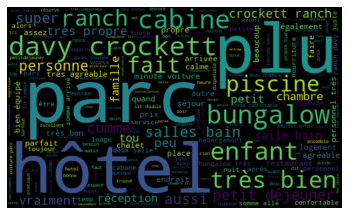

In [28]:
# Word cloud visualization.
import wordcloud
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

allWords = ' '.join([twts for twts in hotel_reviews['commentaires']])
wordCloud = WordCloud(width=500, height=300, random_state=5000, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [29]:
#lancement de l'analyse des sentiments
def getAnalysis(score):
    if score < 0:
        return 'Négatif'
    elif score == 0:
        return 'Neutre'
    else:
        return 'Positif'

hotel_reviews['sentiment'] = hotel_reviews['compound'].apply(getAnalysis)

hotel_reviews.tail(7)

,commentaires,compound,note,sentiment
7638,vient juste passer jours jours vacances eurodi...,0.7003,5,Positif
7639,famille moimême passé excellent séjour old ran...,0.1027,4,Positif
7640,lisez choses horribles français manque magie p...,-0.7269,5,Négatif
7641,meilleur lieux séjourner imagine dépend cherch...,0.0000,3,Neutre
7642,famille deux vacances davy crockett ranch comp...,0.0000,4,Neutre
7643,juste retour davy crockett ranch endroit affre...,-0.4767,1,Négatif
7644,minute trop eurodisney installation site plus ...,0.5574,5,Positif


In [30]:
hotel_reviews['sentiment'].value_counts()

Positif    3273
Neutre     3074
Négatif    1298
Name: sentiment, dtype: int64

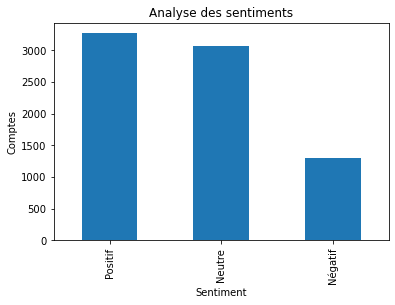

In [34]:
plt.title('Analyse des sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Comptes')
hotel_reviews['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'Hotel Reviews Sentiment')

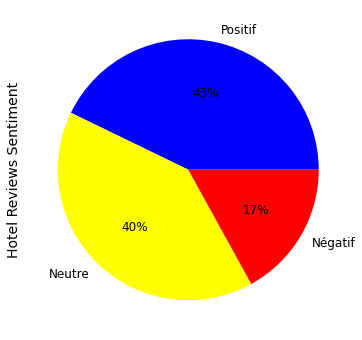

In [32]:
hotel_reviews.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["blue", "yellow","red"])
plt.ylabel("Hotel Reviews Sentiment", size=14)

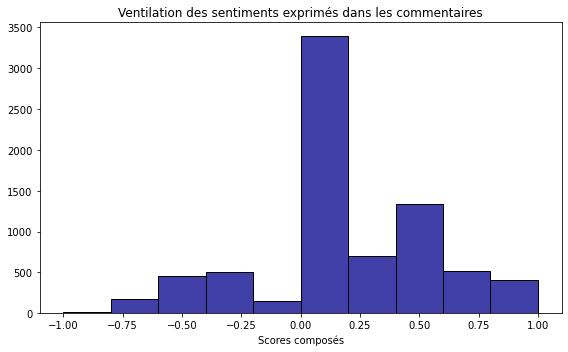

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(hotel_reviews, x='compound', color="darkblue", bins=10, binrange=(-1, 1))
plt.title("Ventilation des sentiments exprimés dans les commentaires")
plt.xlabel("Scores composés")
plt.ylabel("")
plt.tight_layout()

# II. Analyse des sentiments à partir d'une régression logistique (pénalité Ridge)

In [45]:
#pip  install shap

In [46]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap
shap.initjs()

In [47]:
corpus=hotel_reviews['commentaires']
y=hotel_reviews['sentiment']
corpus_train,corpus_test,y_train,y_test=train_test_split(corpus,y,test_size=0.2,random_state=7)
vectorizer=TfidfVectorizer(min_df=10)
X_train=vectorizer.fit_transform(corpus_train)
X_test=vectorizer.transform(corpus_test)

In [48]:
print(X_train[5])

  (0, 271)	0.32559533919828343
  (0, 2173)	0.2321135869850784
  (0, 282)	0.12139299097330847
  (0, 2047)	0.21278207807170063
  (0, 2383)	0.16805411591407618
  (0, 1233)	0.19682322621084308
  (0, 1978)	0.3118013301799101
  (0, 1077)	0.23847793637172607
  (0, 2334)	0.19795495588393655
  (0, 1385)	0.20462010920095985
  (0, 1481)	0.2287823830410424
  (0, 1681)	0.1747346901311614
  (0, 779)	0.2050686886842212
  (0, 2082)	0.47582274719603534
  (0, 1551)	0.09419379917085693
  (0, 2285)	0.17597592165723824
  (0, 381)	0.1358439480706434
  (0, 2058)	0.14932448312925028
  (0, 256)	0.18649853718769938
  (0, 2348)	0.06861167231338838
  (0, 263)	0.08096222876568385


In [49]:
#Avec pénalité Ridge (l2)
model=sklearn.linear_model.LogisticRegression(penalty="l2",C=0.1)
model.fit(X_train,y_train)

LogisticRegression(C=0.1)

In [52]:
#dir(model)

In [51]:
model.classes_

array(['Neutre', 'Négatif', 'Positif'], dtype=object)

In [54]:
model._check_n_features

<bound method BaseEstimator._check_n_features of LogisticRegression(C=0.1)>

In [83]:
explainer=shap.LinearExplainer(model,X_train,feature_perturbation="interventional")
shap_values=explainer.shap_values(X_test)
X_test_array=X_test.toarray()

In [79]:
#dir(shap.summary_plot)

**Termes les plus prédictifs de la satisfaction-clients**

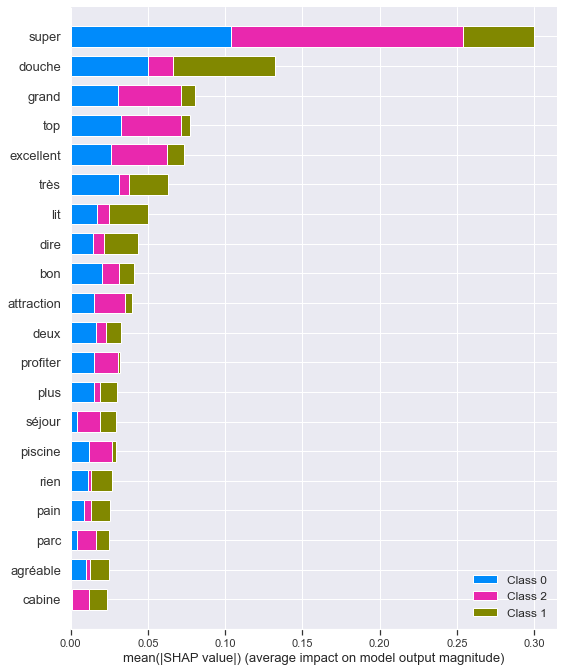

In [80]:
shap.summary_plot(shap_values,X_test_array,feature_names=vectorizer.get_feature_names_out())
#Un avis négatif reçoit un score ≤ 4 /10 et un avis positif, un score ≥ 7 /10.
#Classe neutre=class 0, classe négative=1, classe positive =2

Mêmes résultats en prenant la note.

In [81]:
corpus=hotel_reviews['commentaires']
y=hotel_reviews['note']
corpus_train,corpus_test,y_train,y_test=train_test_split(corpus,y,test_size=0.2,random_state=7)
vectorizer=TfidfVectorizer(min_df=10)
X_train=vectorizer.fit_transform(corpus_train)
X_test=vectorizer.transform(corpus_test)

In [84]:
#Avec pénalité Ridge (l2)
model=sklearn.linear_model.LogisticRegression(penalty="l2",C=0.1)
model.fit(X_train,y_train)

LogisticRegression(C=0.1)

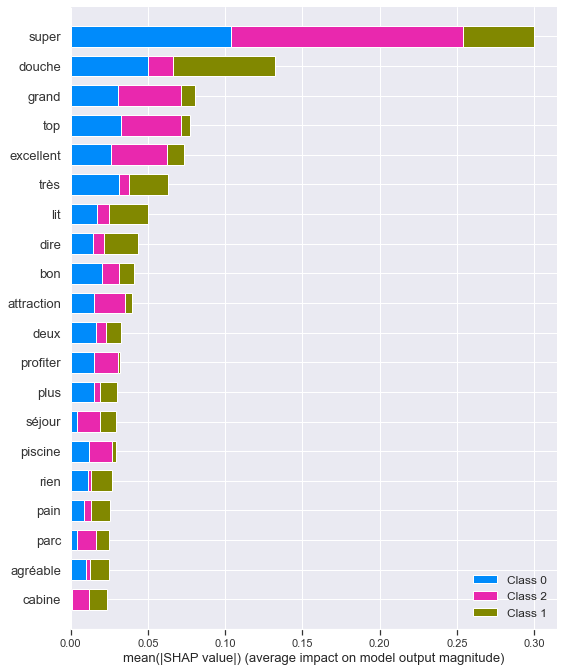

In [85]:
shap.summary_plot(shap_values,X_test_array,feature_names=vectorizer.get_feature_names_out())
#Un avis négatif reçoit un score ≤ 4 /10 et un avis positif, un score ≥ 7 /10.
#Classe neutre=class 0, classe négative=1, classe positive =2

In [86]:
shap_values[1]

array([[-1.35302007e-04, -0.00000000e+00, -0.00000000e+00, ...,
        -7.14846727e-05, -1.94645616e-03,  0.00000000e+00],
       [-1.35302007e-04, -0.00000000e+00, -0.00000000e+00, ...,
        -7.14846727e-05, -1.94645616e-03,  0.00000000e+00],
       [-1.35302007e-04, -0.00000000e+00, -0.00000000e+00, ...,
        -7.14846727e-05, -1.94645616e-03,  0.00000000e+00],
       ...,
       [-1.35302007e-04, -0.00000000e+00, -0.00000000e+00, ...,
        -7.14846727e-05, -1.94645616e-03,  0.00000000e+00],
       [-1.35302007e-04, -0.00000000e+00, -0.00000000e+00, ...,
        -7.14846727e-05,  1.69694242e-02,  0.00000000e+00],
       [-1.35302007e-04, -0.00000000e+00, -0.00000000e+00, ...,
        -7.14846727e-05, -1.94645616e-03,  0.00000000e+00]])

In [89]:
#Graphique interactif de la valeur prédite des termes
#(niveau de contribution positive ou négative de la satisfaction-client)
#lourd en terme de mémoire vive
#ind=1 ou 0
#shap.force_plot(explainer.expected_value[ind],shap_values[ind],feature_names=vectorizer.get_feature_names_out())

# III. NLP Word2Vec avec Gensim

In [ ]:
X_test_array[1]

L'objectif est que les représentations vectorielles des mots soient proches lorsque ces mots correspondent à des contextes similaires 

In [ ]:
import ast
liste=[ast.literal_eval(x) for x in reviews.commentaire]
from gensim.models import Word2Vec
modele = Word2Vec(liste,vector_size=2,window=5)
words= modele.wv
df =pd.DataFrame(words.vectors, columns=['V1','V2'], index=words.key_to_index.keys())

In [ ]:
df.to_csv("words.vectors.txt",sep=";",header=True)

In [ ]:
#(1) Mots-clés dégagés - Sélection des 50 premiers termes
dfMots= df[0:50]

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(dfMots.shape[0]):
    plt.scatter(dfMots.V1,dfMots.V2,s=30)
    plt.annotate(dfMots.index[i],(dfMots.V1[i],dfMots.V2[i]))
plt.show()

In [ ]:
#pour connaître les termes voisins d'un terme, par exemple d'un irritant :
words.most_similar("cher",topn=5)

In [ ]:
#(2) Mots-clés dégagés - Sélection manuelle des thèmes dégagés (liste proche de celle de Marvel = généralisation possible)
mots = ['excellent','emplacement','personnel','dormir','impossible','boissons','personnel','inclus','conciergerie','réception','accueil','weekend','famille','piscine','bouilloire','prix','cher','loin','équipement','bébé','service','bon','bien','merveilleux','mauvaise','expérience','service','cher','baignoire','bouilloire','propre','propreté','manquait','poussière','cheveux','chambre','sommeil','buffet', 'déjeuner']
dfMots2= df.loc[mots, :]
dfMots2.head(10)

In [ ]:
#graphique dans le plan

plt.figure(figsize=(15, 15))
for i in range(dfMots2.shape[0]):
    plt.scatter(dfMots2.V1,dfMots2.V2,s=30)
    plt.annotate(dfMots2.index[i],(dfMots2.V1[i],dfMots2.V2[i]))
plt.show()

In [ ]:
words.most_similar('douche',topn=20)